In [2]:
#installing and importing libraries
!pip install ramanspy
!pip install sif_parser
import ramanspy as rp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sif_parser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 71.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 19.3 MB/s eta 0:00:00
  Created wheel for pysptools: filename=pysptools-0.15.0-py3-none-any.whl size=8133731 sha256=1682c882fb1e05e00c945cd677131b853a25f59e8711d43f2451314a490eb4f5
  Stored in directory: /root/.cache/pip/wheels/ea/08/3b/c045ea3722a5fef1f8698f060a17b59140235fef580fe4f1b5
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0531435a4108ac2ac488d7977eb408db0b48db4f5b20b008d4e55024ceca92b8
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built pysptools wget
  Preparing metadata (setup.py) ... done
  Created wheel for sif_parser: filename=sif_parser-0.3.5-py3-none-any.whl size=17281 sha

In [4]:
#raman shift values
calibvals840 = np.loadtxt('calibrated_values.txt')
calibvals890 = np.loadtxt('calibrated_values890.txt')
combined_array = np.concatenate((calibvals840, calibvals890))
#deleting the overlaps
calibvals_combined_n = np.delete(combined_array, np.arange(2000, 2248))
processed_data = pd.DataFrame({
            'Raman Shift (cm^-1)': calibvals_combined_n
        })
nms = ['840', '890']

In [9]:
#pesticides = ['Metalaxyl', 'Chlorpyrifos', 'Acetamiprid', 'Cypermethrin',
#              'Ametoctradin', 'Imidacloprid', 'Etoxazole', 'Chlormequatchloride',
#              'Pyrimethanil', 'Famoxadone', 'Tebuconazole', 'Boscalid']
#pesticides = ['Thiamethoxam']  ## tetalaxylde 21. eksik
pesticides= ["Metalaxyl"] ## bunda da 1. eksik
#pesticides2= ["P375"]
nms = ['840', '890']

s_plot = []

for pesticide in pesticides:

  for i in range(1, 26):
    combined_spectral_data = []
    for nm in nms:
      file_path = f'/content/{pesticide}-{nm}-{i}.sif'
      try:
        sif_data = sif_parser.np_open(file_path)
        spectral_data = sif_data[0].flatten()
        if (nm == '840'):
          calibvals = calibvals840
        else:
          calibvals = calibvals890
        spectrum = rp.Spectrum(spectral_data, calibvals)

        pipeline = rp.preprocessing.Pipeline([
            rp.preprocessing.despike.WhitakerHayes(),
            rp.preprocessing.baseline.IARPLS(),
            rp.preprocessing.denoise.SavGol(window_length=8, polyorder=2),
            #rp.preprocessing.normalise.MinMax()
        ])

        processed_spectrum = pipeline.apply(spectrum)

        y_processed = processed_spectrum.spectral_data
        combined_spectral_data.append(processed_spectrum.spectral_data)

      except Exception as e:
        print(f"Could not load file. ERROR: {e}")

    combined_spectral_data = np.array(combined_spectral_data)
    combined_spectral_data = np.delete(combined_spectral_data, np.arange(2000, 2248))
    combined_spectrum = rp.Spectrum(combined_spectral_data, calibvals_combined_n)

    s_plot.append(combined_spectrum)
    processed_data[f'{pesticide}-{i}'] = combined_spectral_data

<Axes: title={'center': 'Mean Spectra of Samples'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

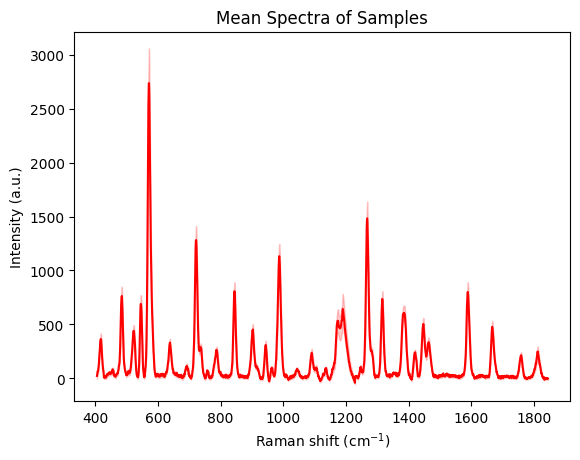

In [10]:
rp.plot.mean_spectra(s_plot, title=f'Mean Spectra of Samples', color= 'red')

In [7]:
processed_data.to_csv('processed_raman_data.csv', index=False)

<Axes: title={'center': 'Processed Spectrum'}, xlabel='Raman shift (cm$^{{{-1}}}$)', ylabel='Intensity (a.u.)'>

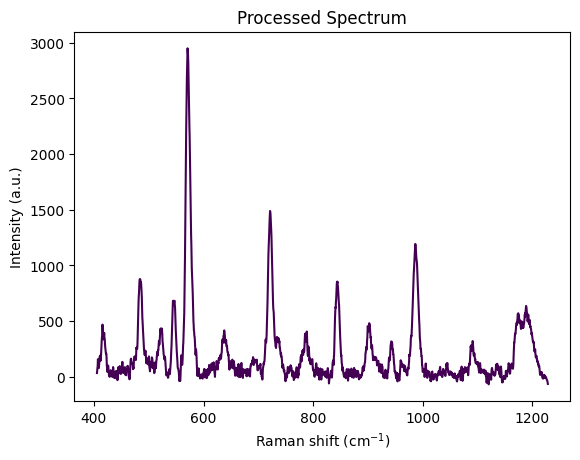

In [14]:
file_path = f'/content/Metalaxyl-840-2.sif'
sif_data = sif_parser.np_open(file_path)
spectral_data = sif_data[0].flatten()
calibvals = calibvals840
spectrum = rp.Spectrum(spectral_data, calibvals)
processed_spectrum = pipeline.apply(spectrum)
rp.plot.spectra(processed_spectrum, title='Processed Spectrum')